In [1]:
import struct
import pandas as pd
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(24, 13.5)}, font_scale = 2.7)

In [15]:
log = 'flight_logs/h_flight_2.log'
#log = 'flight_logs/h_flight_2.log'

In [16]:
log_b = None
with open(log, 'r') as f:
    log_str = f.read()
    
log_str_formatted = log_str.replace('\r\n', ' ')
log_str_formatted = log_str_formatted.replace('  ', ' ')

In [17]:
log_b = bytes.fromhex(log_str_formatted)

In [18]:
print(log_b[:20])

b'\x04\x00\x00\x00\xbc\x88\x00\x00\xcby\x01\x00$\t\x00\x00\x05\x00\x00\x00'


In [19]:
imu = []
baro = []
flight_info = []
flight_state = []
covariance_info = []

In [20]:
i = 0
while i < len(log_b):
    t = struct.unpack('<L', log_b[i:i+4])[0]
    i += 4
    if t in [1, 2, 3]:
        ts, gyro_x, gyro_y, gyro_z, acc_x, acc_y, acc_z = struct.unpack('<Lhhhhhh', log_b[i: i+16])
        #print(f"{ts} IMU {t-1}: Gx: {gyro_x}, Gy: {gyro_y}, Gz: {gyro_z}, Ax: {acc_x}, Ay: {acc_y}, Az: {acc_z}")
        imu.append({'ts': ts,
                    'id': f'IMU{t - 1}',
                    'Gx': gyro_x,
                    'Gy': gyro_y,
                    'Gz': gyro_z,
                    'Ax': acc_x,
                    'Ay': acc_y,
                    'Az': acc_z})
        #print(imu_data)
        i += 4 + 6 + 6 #ts + 6 x int16
    elif t in [4, 5, 6]:
        ts, pressure, temperature = struct.unpack('<LLL', log_b[i: i+12])
        #print(f"{ts} BARO {t-4}: P: {pressure}, T: {temperature}")
        baro.append({'ts': ts,
                     'id': f'BARO{t - 4}',
                     'P': temperature,
                     'T': pressure})
        #print(baro_data)
        i += 4 + 4 + 4
    elif t == 7:
        ts, height, velocity, acceleration = struct.unpack('<Lfff', log_b[i: i+16])
        print(f"{ts} FLIGHT_INFO: Height: {height}, Velocity: {velocity}, Acc: {acceleration}")
        flight_info.append({'ts': ts,
                            'height': height,
                            'velocity': velocity,
                            'acceleration': acceleration})
        #print(flight_info_data)
        i += 4 + 4 + 4 + 4
    elif t == 8:
        #print("FLIGHT_STATE")
        #ts, state = struct.unpack('<LB', log_b[i: i+5])
        ts, state = struct.unpack('<LL', log_b[i: i+8])
        flight_state.append({'ts': ts, 'state': state})
        print(f"{ts} FLIGHT STATE: State: {state}")
        i += 4 + 4
    elif t == 9:
        ts, height_cov, velocity_cov = struct.unpack('<Lff', log_b[i: i+12])
        #print(f"{ts} COVARIANCE_INFO: Height cov: {height_cov}, Velocity cov: {velocity_cov}")
        covariance_info.append({'ts': ts,
                                'height_cov': height_cov,
                                'velocity_cov': velocity_cov})
        #print(flight_info_data)
        i += 4 + 4 + 4
    else:
        print("ERROR")

35005 FLIGHT_INFO: Height: 278.9469909667969, Velocity: -182.04600524902344, Acc: 0.009579658508300781
35015 FLIGHT_INFO: Height: 278.8160095214844, Velocity: -182.24600219726562, Acc: 0.0
35025 FLIGHT_INFO: Height: 278.67498779296875, Velocity: -182.43899536132812, Acc: 0.0
35035 FLIGHT_INFO: Height: 278.56298828125, Velocity: -182.6510009765625, Acc: 0.0
35045 FLIGHT_INFO: Height: 278.4360046386719, Velocity: -182.8520050048828, Acc: 0.0
35055 FLIGHT_INFO: Height: 278.29901123046875, Velocity: -181.0469970703125, Acc: -0.009579658508300781
35065 FLIGHT_INFO: Height: 278.1709899902344, Velocity: -181.2469940185547, Acc: 0.009579658508300781
35075 FLIGHT_INFO: Height: 278.0530090332031, Velocity: -181.4510040283203, Acc: 0.01916027069091797
35085 FLIGHT_INFO: Height: 277.9309997558594, Velocity: -181.6540069580078, Acc: 0.009579658508300781
35095 FLIGHT_INFO: Height: 277.8139953613281, Velocity: -181.85800170898438, Acc: 0.01916027069091797
35105 FLIGHT_INFO: Height: 277.69500732421875

In [21]:
imu_df = pd.DataFrame(imu)

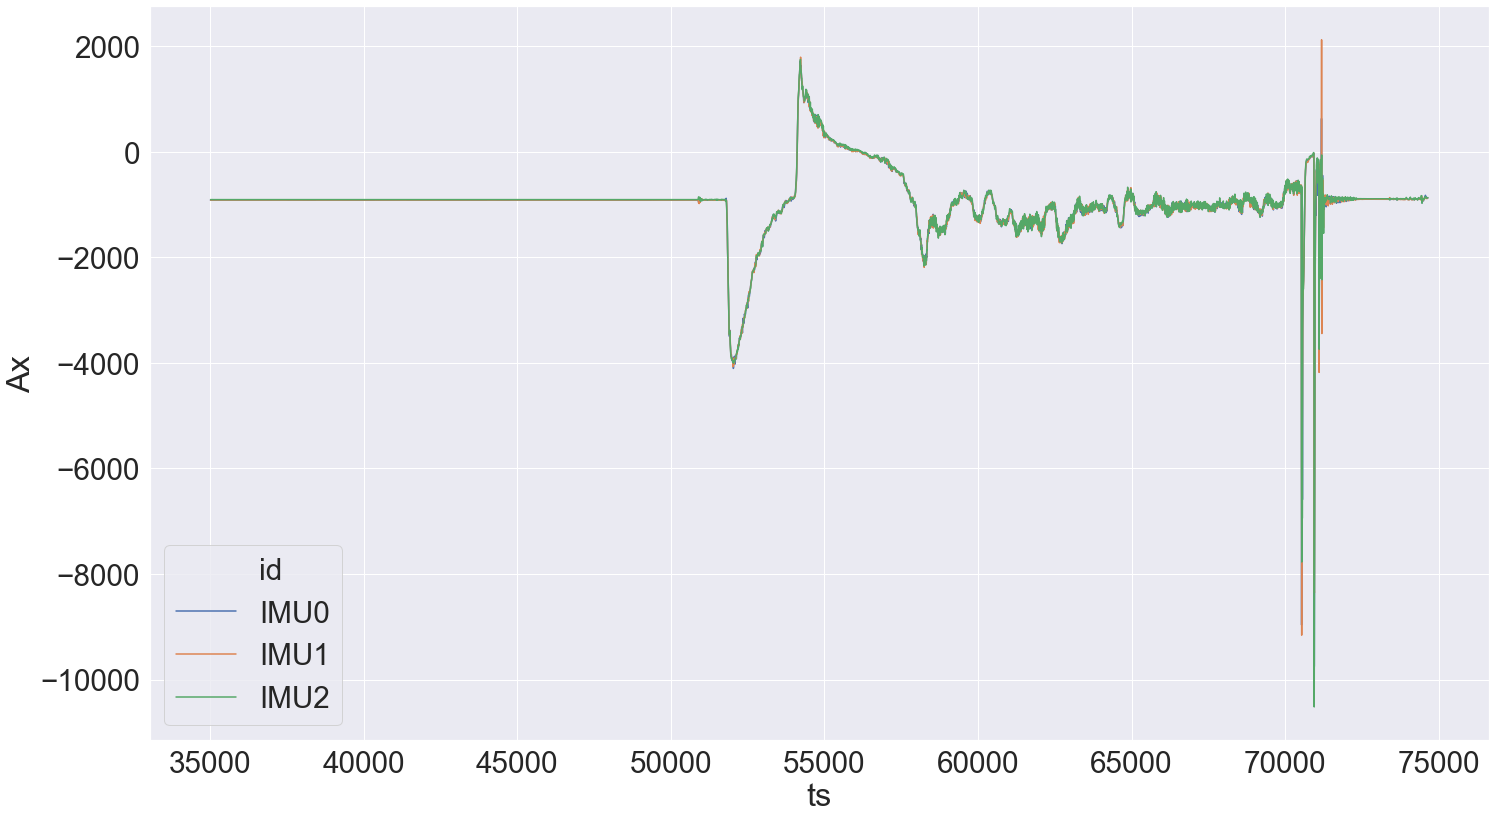

In [22]:
sns.lineplot(data = imu_df, x = 'ts', y = 'Ax', hue = 'id')
#ax.set_ylim(-10, 6000)
#ax.set_xlim(45000, 48000)

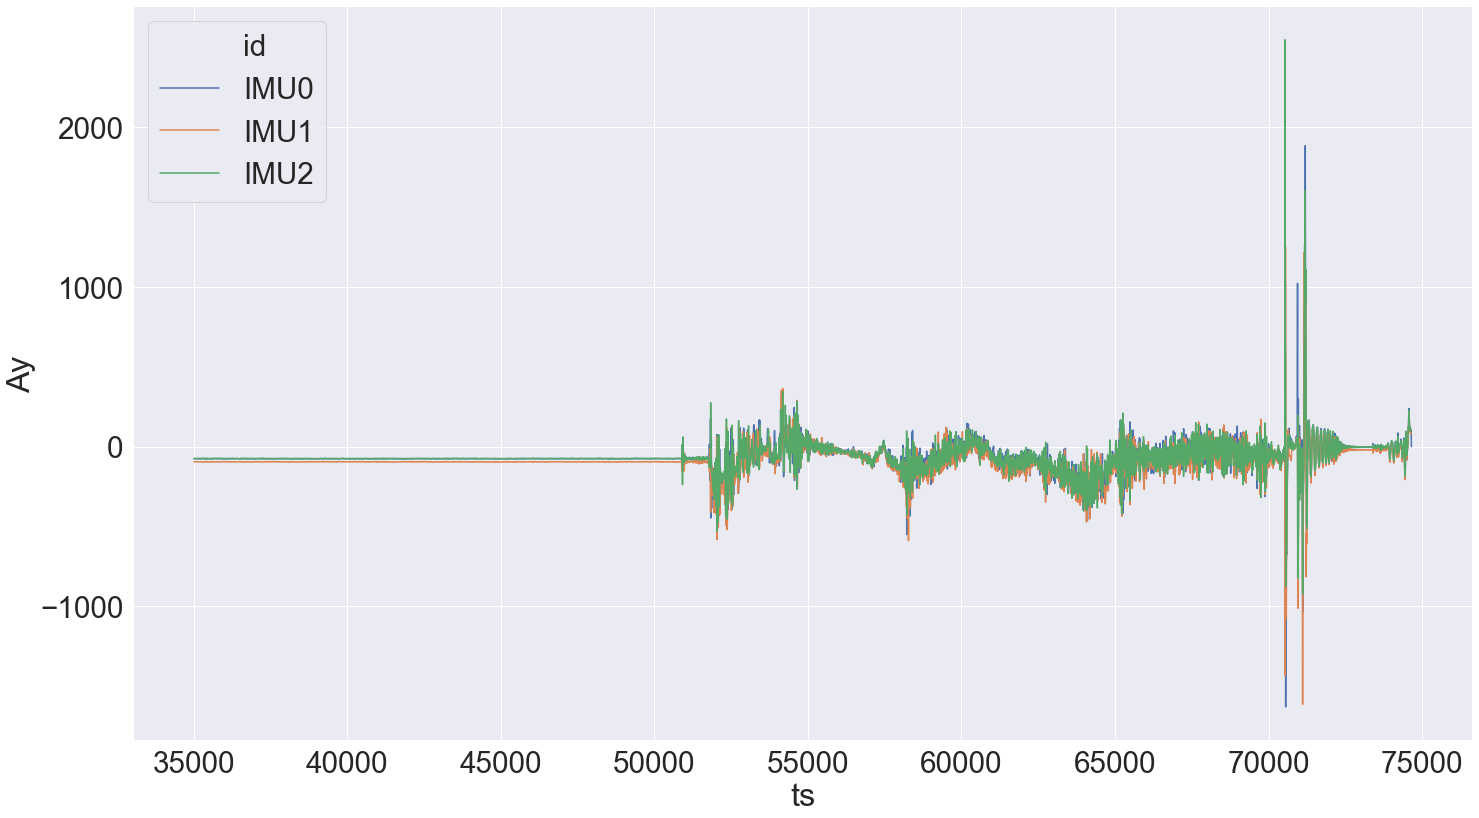

In [23]:
sns.lineplot(data = imu_df, x = 'ts', y = 'Ay', hue = 'id')

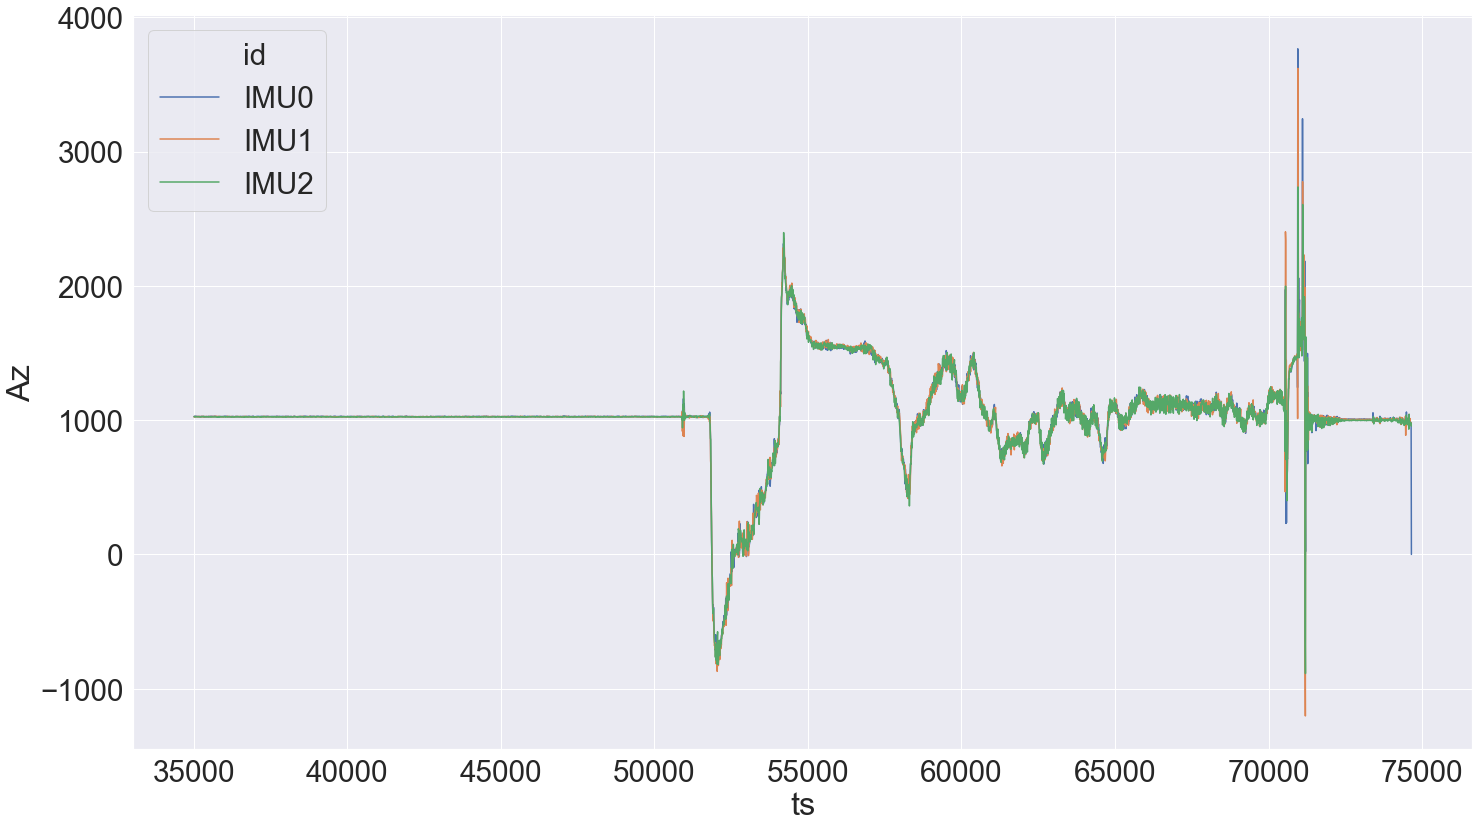

In [24]:

ax = sns.lineplot(data = imu_df, x = 'ts', y = 'Az', hue = 'id')

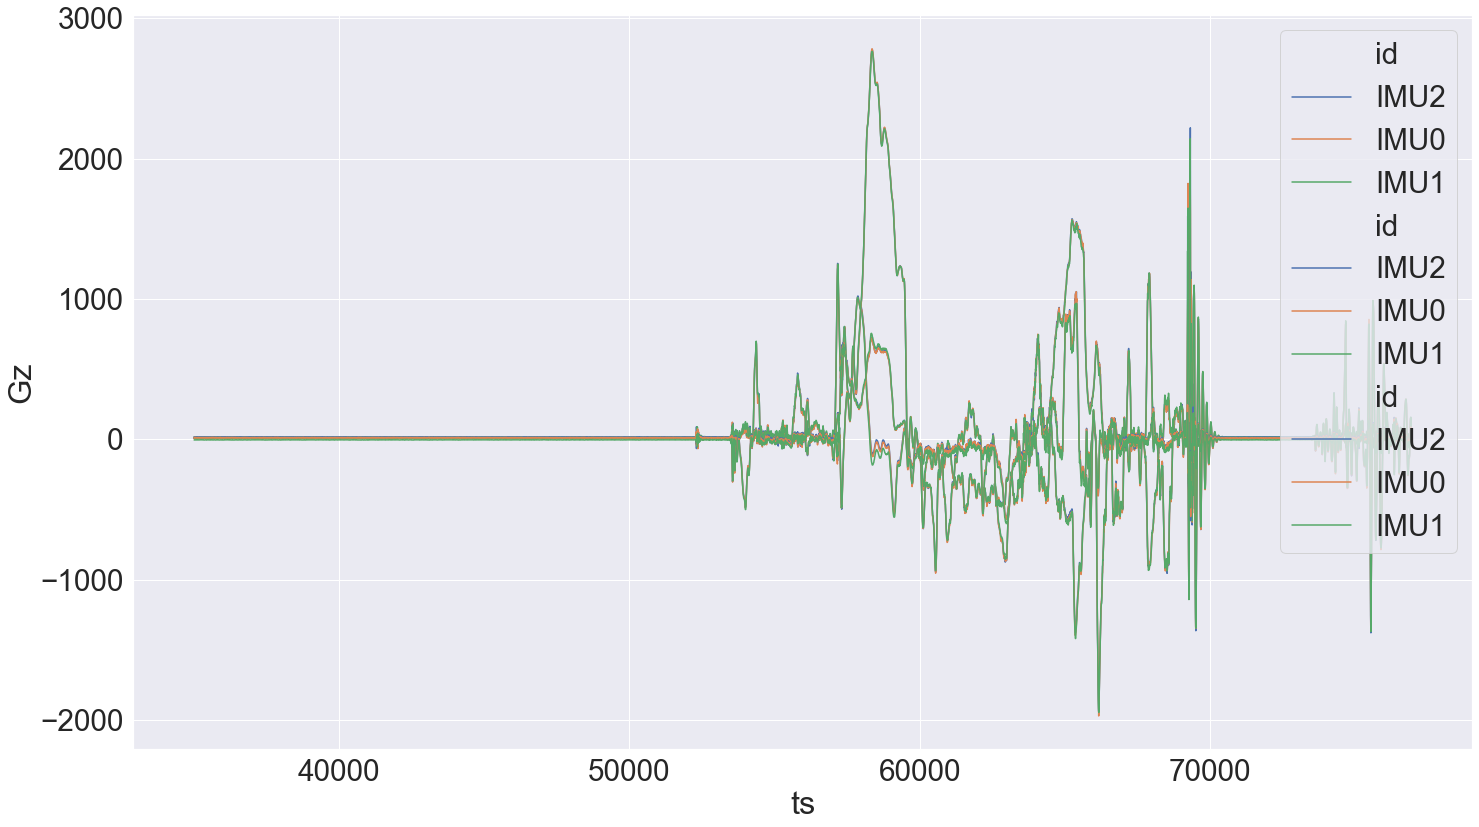

In [11]:
sns.lineplot(data = imu_df, x = 'ts', y = 'Gx', hue = 'id')
sns.lineplot(data = imu_df, x = 'ts', y = 'Gy', hue = 'id')
sns.lineplot(data = imu_df, x = 'ts', y = 'Gz', hue = 'id')

In [15]:
flight_state

[{'ts': 39401, 'state': 2}, {'ts': 57521, 'state': 1}]

In [16]:
flight_info_df = pd.DataFrame(flight_info)

In [17]:
flight_info_df

,ts,height,velocity,acceleration
0,35009,293.957001,-192.429001,0.354463
1,35019,293.825989,-192.643005,0.354463
2,35029,293.694000,-192.856995,0.364043
3,35039,293.565002,-191.070999,0.373623
4,35049,293.406006,-191.266998,0.364043
...,...,...,...,...
4188,76889,-1.420000,-2.070000,-0.092113
4189,76899,-1.404000,-2.075000,-0.027634
4190,76909,-1.398000,-2.083000,0.009211
4191,76919,-1.397000,-2.092000,-0.101324


In [18]:
covariance_df = pd.DataFrame(covariance_info)

In [19]:
#lower_bound = flight_info_df.height + 3*(covariance_df.height_cov)**0.5]
flight_info_df['lower_bound'] = flight_info_df.height + 3*(covariance_df.height_cov)**0.5
flight_info_df['upper_bound'] = flight_info_df.height - 3*(covariance_df.height_cov)**0.5

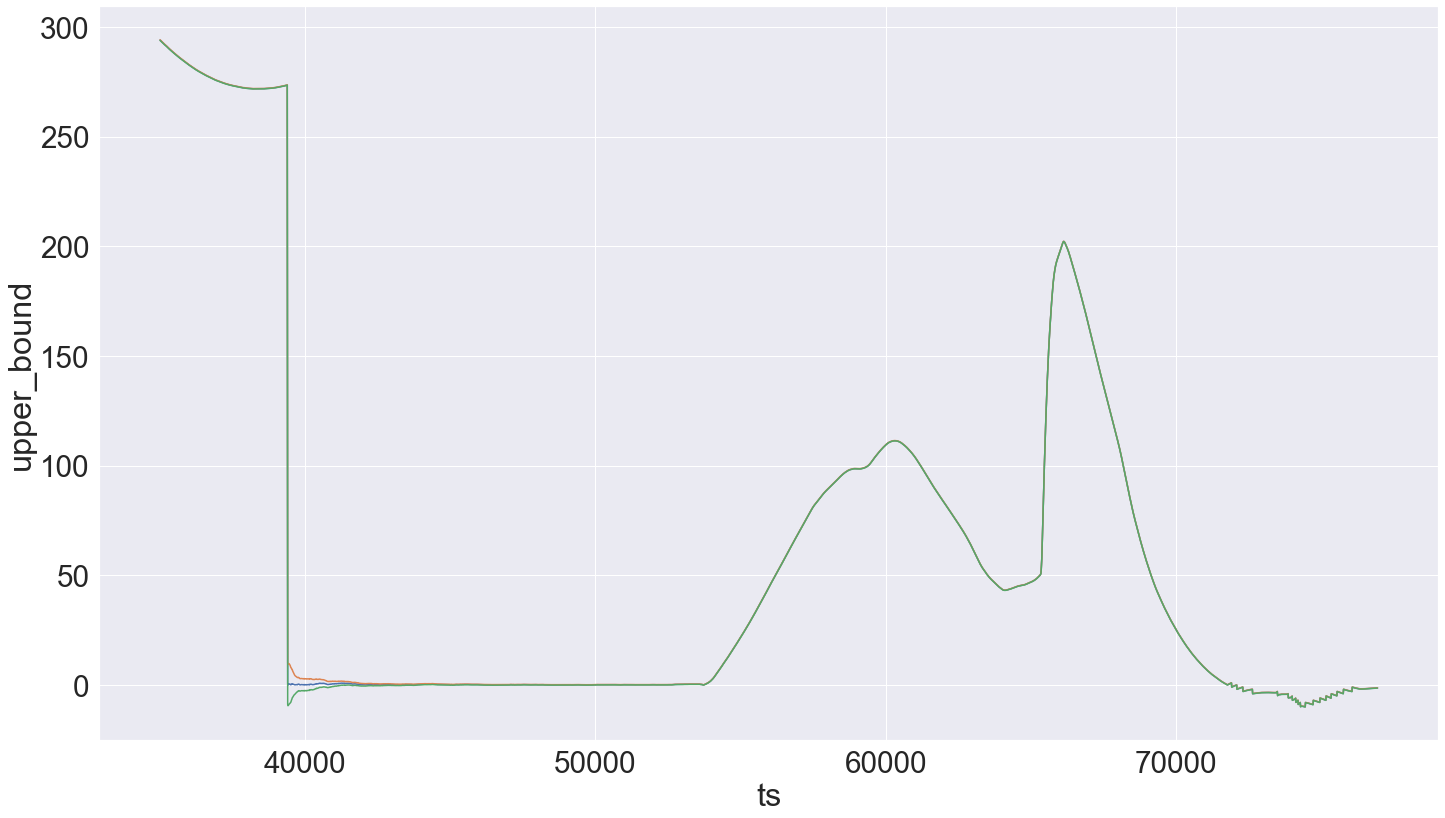

In [20]:
sns.lineplot(data = flight_info_df, x = 'ts', y = 'height')
sns.lineplot(data = flight_info_df, x = 'ts', y = 'lower_bound')
ax = sns.lineplot(data = flight_info_df, x = 'ts', y = 'upper_bound')
#ax.set_ylim(-10, 10)
#ax.set_xlim(45000, 48000)

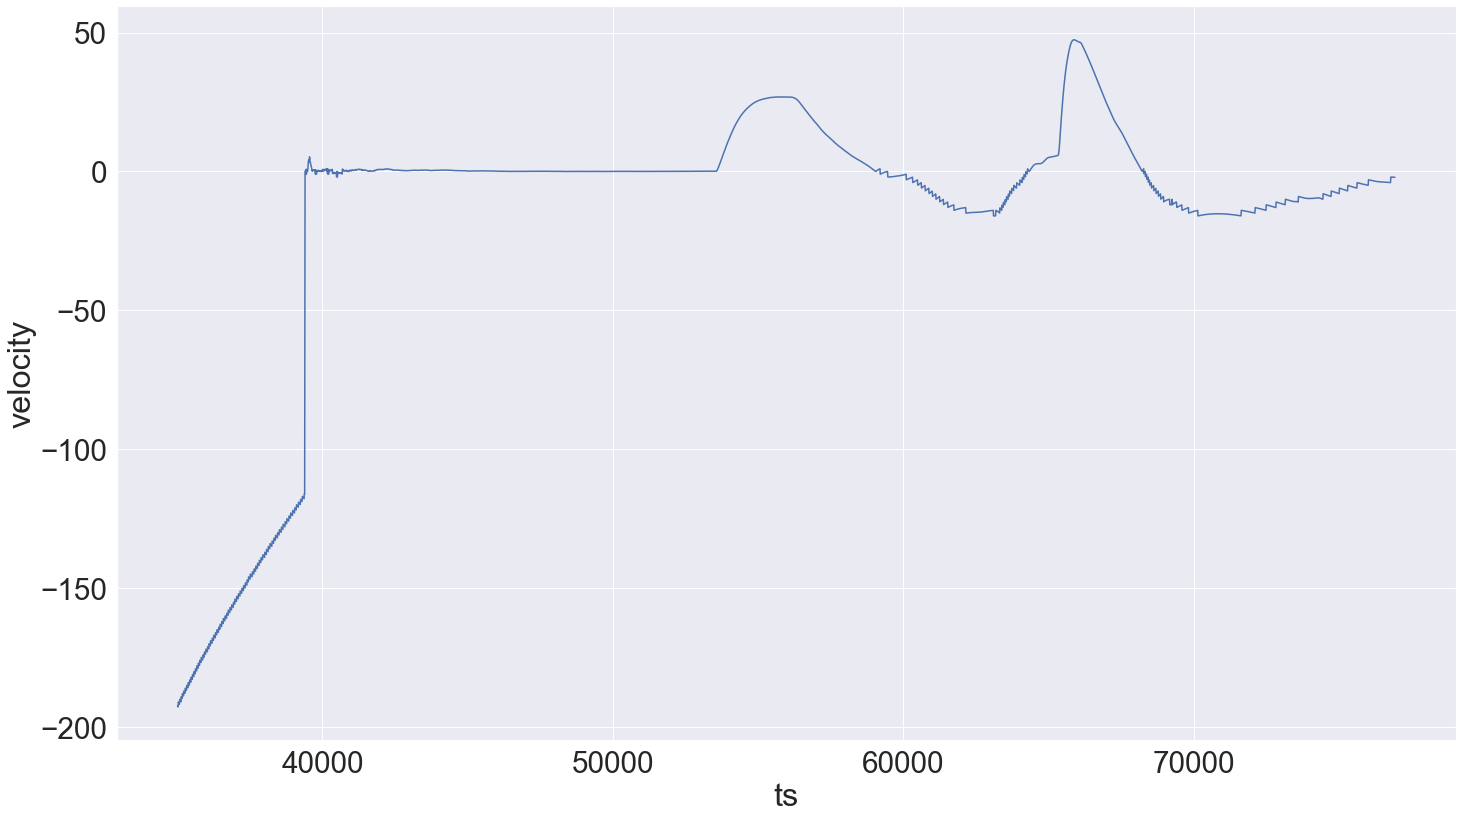

In [21]:
ax = sns.lineplot(data = flight_info_df, x = 'ts', y = 'velocity')
#ax.set_ylim(-5)
#ax.set_xlim(38000)

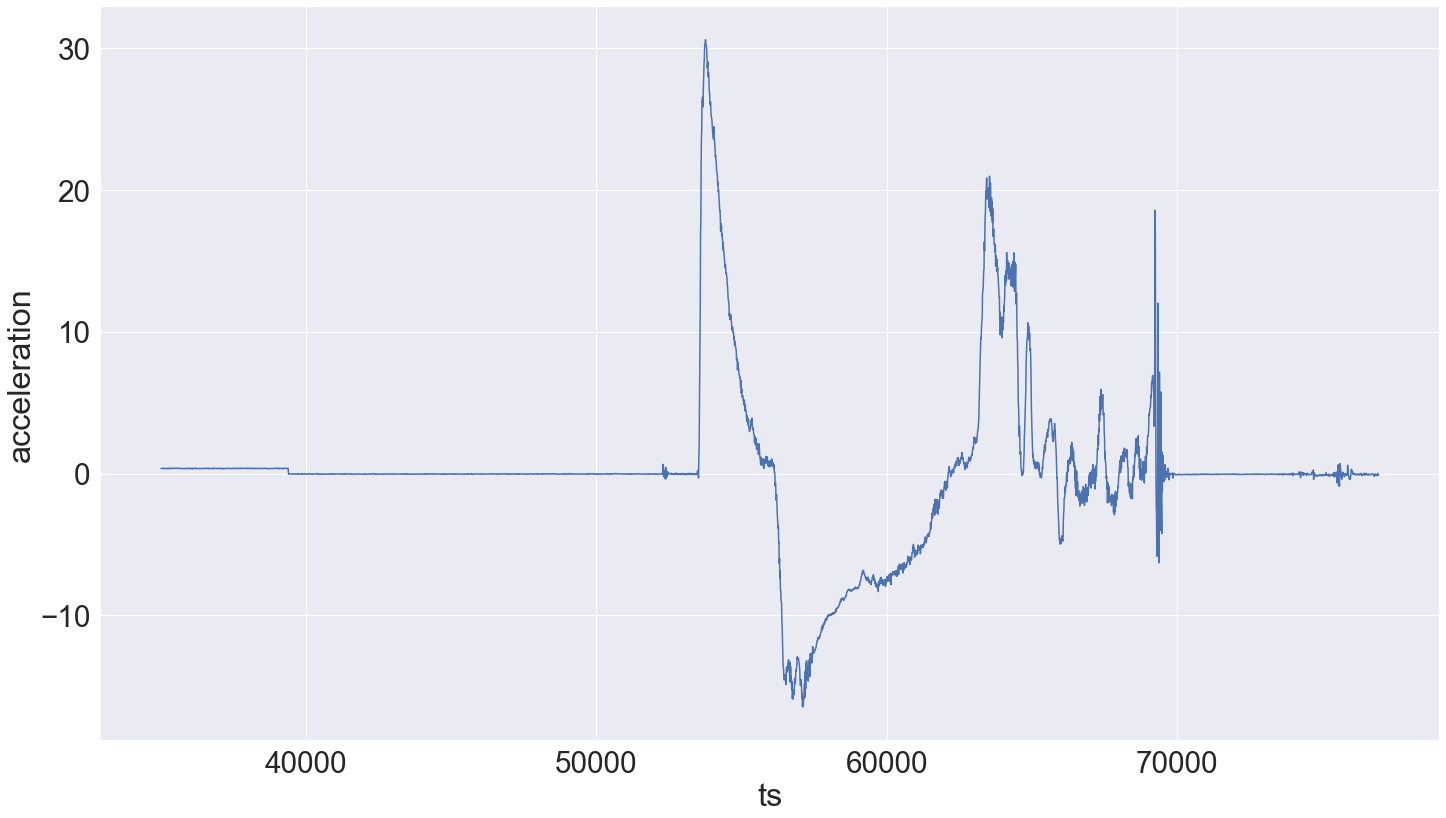

In [22]:
ax = sns.lineplot(data = flight_info_df, x = 'ts', y = 'acceleration')
#ax.set_ylim(-5)
#ax.set_xlim(38000)